In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from pathlib import Path
import sys
proj_dir = Path.cwd().parent

sys.path.append(str(proj_dir))


In [4]:
from datasets import load_dataset

In [28]:
dataset = load_dataset('derek-thomas/dataset-creator-askreddit', download_mode="reuse_cache_if_exists", ignore_verifications=True)

Using custom data configuration derek-thomas--dataset-creator-askreddit-a3c1289ebaf83d16


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating all_days split:   0%|          | 0/3272 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /Users/derekthomas/.cache/huggingface/datasets/derek-thomas___parquet/derek-thomas--dataset-creator-askreddit-a3c1289ebaf83d16/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
df = dataset['all_days'].to_pandas()
df

score  num_comments                                              title  \
0         2             4  Reddit, if someone had to describe you to a st...   
1         5            24  What kind of car does the average \nRedditor d...   
2         1             5  What movies have made you go back to the theat...   
3         0            18                                     Worst fear(s)?   
4        11            29  If there was a type of ink that lasted only fo...   
...     ...           ...                                                ...   
3267      0            11  Smokers of Reddit- What are your reasons for s...   
3268      1             4                                                 Hi   
3269      1             2  At the stroke of midnight I was writing this p...   
3270      1             2  With all the rape stories in the news, why don...   
3271      0             3              Do beautiful people have low entropy?   

                                              permalink  \
0     /r/AskReddit/comments/15sn6y/reddit_if_someone...   
1     /r/AskReddit/comments/15sn6m/what_kind_of_car_...   
2     /r/AskReddit/comments/15sn6b/what_movies_have_...   
3             /r/AskReddit/comments/15sn4u/worst_fears/   
4     /r/AskReddit/comments/15sn44/if_there_was_a_ty...   
...                                                 ...   
3267  /r/AskReddit/comments/15qzen/smokers_of_reddit...   
3268                   /r/AskReddit/comments/15qzei/hi/   
3269  /r/AskReddit/comments/15qzdx/at_the_stroke_of_...   
3270  /r/AskReddit/comments/15qzdc/with_all_the_rape...   
3271  /r/AskReddit/comments/15qzd3/do_beautiful_peop...   

                                               selftext  \
0     They would be talking about you without your p...   
1     I've always wanted to know what kind of car th...   
2                                                         
3                   So what is your worst fear, reddit?   
4                                                         
...                                                 ...   
3267  I'm very curious as to what causes someone to ...   
3268                                                      
3269                                                      
3270                                                      
3271  I have been reading about entropy and arrows o...   

                                                    url  \
0     http://www.reddit.com/r/AskReddit/comments/15s...   
1     http://www.reddit.com/r/AskReddit/comments/15s...   
2     http://www.reddit.com/r/AskReddit/comments/15s...   
3     http://www.reddit.com/r/AskReddit/comments/15s...   
4     http://www.reddit.com/r/AskReddit/comments/15s...   
...                                                 ...   
3267  http://www.reddit.com/r/AskReddit/comments/15q...   
3268  http://www.reddit.com/r/AskReddit/comments/15q...   
3269  http://www.reddit.com/r/AskReddit/comments/15q...   
3270  http://www.reddit.com/r/AskReddit/comments/15q...   
3271  http://www.reddit.com/r/AskReddit/comments/15q...   

                   created_utc            author      id  downs  ups  \
0    2013-01-01 23:59:40+00:00         [deleted]  15sn6y      0    2   
1    2013-01-01 23:59:31+00:00       PaytonAdams  15sn6m      0    5   
2    2013-01-01 23:59:20+00:00         [deleted]  15sn6b      0    1   
3    2013-01-01 23:58:37+00:00         [deleted]  15sn4u      0    0   
4    2013-01-01 23:58:15+00:00        Honeybeard  15sn44      0   11   
...                        ...               ...     ...    ...  ...   
3267 2013-01-01 00:01:36+00:00           kelsofb  15qzen      0    0   
3268 2013-01-01 00:01:34+00:00           ImJE5US  15qzei      0    1   
3269 2013-01-01 00:01:15+00:00  Sangfroid_Sonder  15qzdx      0    1   
3270 2013-01-01 00:00:58+00:00         [deleted]  15qzdc      0    1   
3271 2013-01-01 00:00:53+00:00         [deleted]  15qzd3      0    0   

            date      time  
0     2013-01-01  23:59:

In [16]:
df.convert_dtypes().dtypes

score            Int64
num_comments     Int64
title           string
permalink       string
selftext        string
url             string
created_utc     string
author          string
id              string
downs            Int64
ups              Int64
dtype: object

In [18]:
import pandas as pd

In [21]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['date'] = df['created_utc'].dt.date
df['time'] = df['created_utc'].dt.time

In [33]:
df.date.value_counts()

2013-01-01    3272
Name: date, dtype: int64

In [26]:
new_df = df.drop_duplicates(subset=['id'], keep="first")

<Axes: >

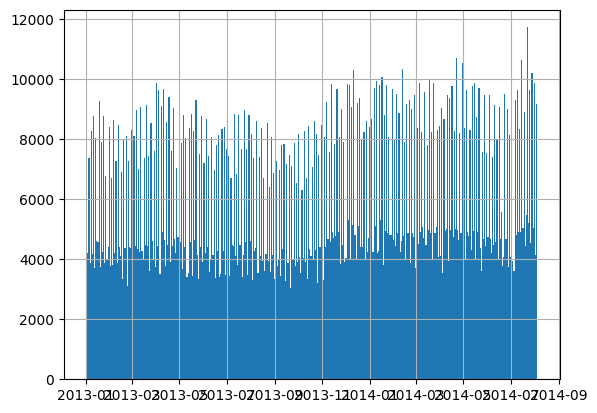

In [27]:
new_df.date.hist(bins=400)